# 导入依赖库

In [26]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# 项目一

## 读取数据

In [7]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 训练集、测试集划分

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], test_size=0.25,
                                                    random_state=0)

## 模型训练和预测

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
clf = DecisionTreeClassifier(random_state=0,max_depth=2) # max_depth设置为2，预剪枝，保证树的深度不超过2；random_state为0，确保结果可重复

In [14]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [15]:
# 预测单个值
clf.predict(X_test.iloc[0].values.reshape(1, -1))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([2])

In [17]:
# 预测多个值
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2])

In [18]:
clf.score(X_test,y_test) # 使用accuracy作为评价指标

0.8947368421052632

## 选择最佳max_depth


In [22]:
max_depth_range = list(range(1,6))
accuracy = list()
for max_depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=max_depth,random_state=0)
    clf.fit(X_train,y_train)
    accuracy.append(clf.score(X_test,y_test))

In [20]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

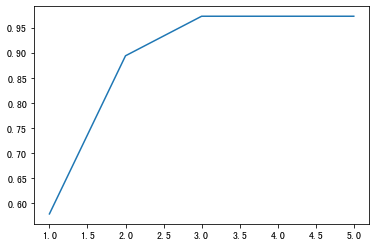

In [24]:
plt.plot(max_depth_range,accuracy)

选择3为最佳的max_depth

## 特征重要程度

In [27]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
3,petal width (cm),0.581
2,petal length (cm),0.399
1,sepal width (cm),0.020
0,sepal length (cm),0.000


# 项目二

In [29]:
-1/2*np.log2(1/2)-1/2*np.log2(1/2)

1.0

In [31]:
(-np.log2(2/3)*2/3-np.log2(1/3)*1/3)*3/5

0.5509775004326938

In [33]:
-1/5*np.log2(1/5)-3/5*np.log2(3/5)-1/5*np.log2(1/5)

1.3709505944546687

In [35]:
0.42/1.371

0.3063457330415755